In [1]:
import pandas as pd
import requests
import re
import numpy as np

In [2]:
content = requests.get('https://uk.wikipedia.org/wiki/Населення_України#Народжуваність')

In [3]:
data = pd.read_html(content.content, match=re.compile('Коефіцієнт народжуваності '))[0]

In [4]:
# Вывести первые строки таблицы с помощью метода head
data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [5]:
# Определите количество строк и столбцов в датафрейме (атрибут shape)
data.shape

(28, 9)

In [6]:
# Замените в таблице значения "—" на значения NaN
data.replace({'—': np.NaN}, inplace=True)

In [7]:
# Определите типы всех столбцов с помощью dataframe.dtypes
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [8]:
# Так як метод зчитав таблицю і не взяв "," до уваги, потрібно було всі значення поділити на 10
# Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"
data.iloc[:, 1:] = data.iloc[:, 1:].astype(float).apply(lambda x: x / 10)

In [9]:
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [10]:
# Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
data.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [11]:
# Удалите из таблицы данные по всей стране, последняя строчка таблицы
data.drop([27], inplace=True)

In [12]:
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [13]:
# Варіант1
# Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)
data.iloc[:, 1:] = data.iloc[:, 1: ].fillna(dict(zip(data.columns[1:], map(lambda column: np.mean(data[column]), data.columns[1:]))))

In [14]:
# Варіант 2
# Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)
data.fillna(data.mean())

C:\Users\User\AppData\Local\Temp/ipykernel_39772/3393887385.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


In [15]:
# Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине
data[data['2019'] > data['2019'].mean()]['Регіон']

0                  Крим
2             Волинська
4              Донецька
6          Закарпатська
8     Івано-Франківська
11            Луганська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
26          Севастополь
Name: Регіон, dtype: object

In [16]:
# В каком регионе была самая высокая рождаемость в 2014 году?
data[['Регіон','2014']].max()

Регіон    Чернігівська
2014              14.8
dtype: object

<AxesSubplot:>

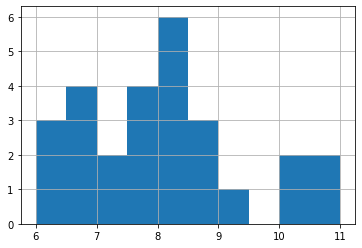

In [17]:
# Постройте столбцовую диаграмму рождаемости по регионам в 2019 году
data['2019'].hist()